In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


Copied from: https://www.codeproject.com/Articles/1087025/Using-Python-to-Solve-Computational-Physics-Proble

This article demonstrates how to use Python to solve simple Laplace equation with Numpy library and 
Matplotlib to plot the solution of the equation. We will also see that we can write less code and do more with 
Python.

# Introduction

Laplace equation is a simple second-order partial differential equation. It is also a simplest example of elliptic partial differential equation. This equation is very important in science, especially in physics, because it describes behaviour of electric and gravitation potential, and also heat conduction. In thermodynamics (heat conduction), we call Laplace equation as steady-state heat equation or heat conduction equation.

In this article, we will solve the Laplace equation using numerical approach rather than analytical/calculus approach. When we say numerical approach, we refer to discretization. Discretization is a process to "transform" the continuous form of differential equation into a discrete form of differential equation; it also means that with discretization, we can transform the calculus problem into matrix algebra problem, which is favored by programming.

Here, we want to solve a simple heat conduction problem using finite difference method. We will use Python Programming Language, Numpy (numerical library for Python), and Matplotlib (library for plotting and visualizing data using Python) as the tools. We'll also see that we can write less code and do more with Python.

# The Code

This is the Laplace equation in 2-D cartesian coordinates (for heat equation)

$$ \frac{\partial^2 T}{\partial^2 x}+\frac{\partial^2 T}{\partial^2 y}=0 $$

Where T is temperature, x is x-dimension, and y is y-dimension. x and y are functions of position in Cartesian coordinates.

Here, we only need to solve 2-D form of the Laplace equation. The problem to solve is shown below:

What we will do is find the steady state temperature inside the 2-D plat (which also means the solution of Laplace equation) above with the given boundary conditions (temperature of the edge of the plat). Next, we will discretize the region of the plat, and divide it into meshgrid, and then we discretize the Laplace equation above with finite difference method. This is the discretized region of the plat.

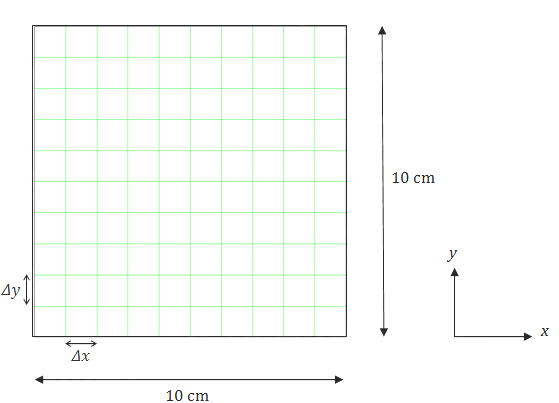

We set $Δx = Δy = 1 cm$, and then make the grid as shown below:

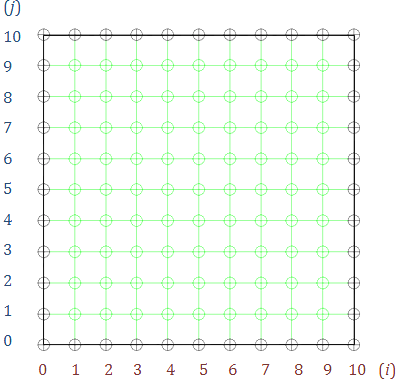

Note that the green nodes are the nodes that we want to know the temperature there (the solution), and the white nodes are the boundary conditions (known temperature). Here is the discrete form of Laplace Equation above.

$$
\frac{T_{i+1, j}-2 T_{i, j}+T_{i-1, j}}{(\Delta x)^{2}}+\frac{T_{i, j+1}-2 T_{i, j}+T_{i, j-1}}{(\Delta y)^{2}}=0
$$

In our case, the final discrete equation is shown below.

$$
T_{i, j}=\frac{1}{4}\left(T_{i+1, j}+T_{i-1, j}+T_{i, j+1}+T_{i, j-1}\right)
$$

Now, we are ready to solve the equation above. To solve this, we use "guess value" of interior grid (green nodes), here we set it to 30 degree Celsius (or we can set it 35 or other value), because we don't know the value inside the grid (of course, those are the values that we want to know). Then, we will iterate the equation until the difference between value before iteration and the value until iteration is "small enough", we call it convergence. In the process of iterating, the temperature value in the interior grid will adjust itself, it's "selfcorrecting", so when we set a guess value closer to its actual solution, the faster we get the "actual" solution.

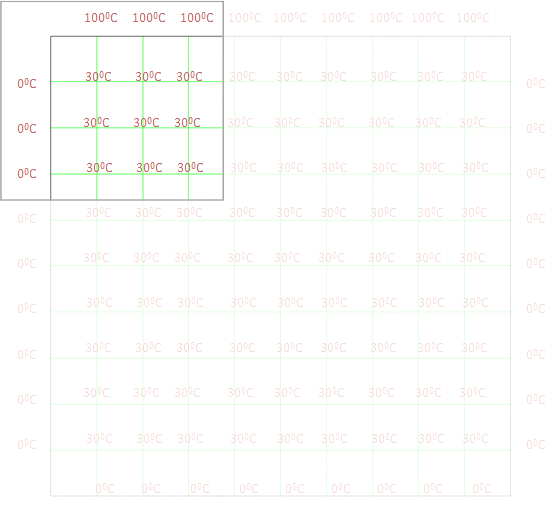

We are ready for the source code. In order to use Numpy library, we need to import Numpy in our source code, and we also need to import Matplolib.Pyplot module to plot our solution. So the first step is to import necessary modules.

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import time

and then, we set the initial variables into our Python source code:

In [2]:
# Set maximum iteration
#maxIter = 500

# Set Dimension and delta
lenX = 5 #we set it rectangular
lenY= 5

# Boundary condition
Ttop = 0 #lado derecho
Tbottom = 0 #lado izquierdo
Tleft = 0 #lado de abajo
Tright = 100 #lado de arriba

# Initial guess of interior grid
Tguess = 30

What we will do next is to set the "plot window" and meshgrid. Here is the code:

In [3]:
# Set colour interpolation and colour map.
# You can try set it to 10, or 100 to see the difference
# You can also try: colourMap = plt.cm.coolwarm
colorinterpolation = 50
colourMap = plt.cm.jet

# Set meshgrid
X, Y = np.meshgrid(np.arange(0, lenX), np.arange(0, lenY))

np.meshgrid() creates the mesh grid for us (we use this to plot the solution), the first parameter is for the x-dimension, and the second parameter is for the y-dimension. We use np.arange() to arrange a 1-D array with element value that starts from some value to some value, in our case, it's from 0 to lenX and from 0 to lenY. Then we set the region: we define 2-D array, define the size and fill the array with guess value, then we set the boundary condition, look at the syntax of filling the array element for boundary condition above here.

Then we are ready to apply our final equation into Python code below. We iterate the equation using for loop.

In [23]:
T = np.empty((lenX, lenY))
T.fill(Tguess)
# Set Boundary condition
T[0,1:lenX-1] = Ttop #0    #[fila,columna]
T[lenX-1,:] = Tbottom #0
T[:,lenY-1]= Tright #100
T[:,0] = Tleft #0

target = 1e-2  # Target accuracy

# Iteration (We assume that the iteration is convergence in maxIter = 500)
cont=0
error=1
cont=0
w=0.9
p=1
print("Please wait for a moment")
while error>target:
    # print("matriz antes de pasar por el metodo de gauss")
    # print(T)
    error=0
    for i in range(1, lenX-1, p):
        for j in range(1, lenY-1, p):
            diff=0.25*(T[i+1][j] + T[i-1][j] + T[i][j+1] + T[i][j-1])-T[i][j]
            T[i][j]=T[i][j]+(w+1)*diff
            
            if (diff>error):
                error=diff
    # print("matriz despues de ser evaluada por el metodo de gauss")
    # print(T)
    # print("error=",error)
    percentage=cont/69*100
    print("Completado:{} %".format(round(percentage,2)), end='\r')
    time.sleep(0.1)
    cont+=1

print("Iteration finished")
print(cont)

Please wait for a moment
Iteration finished
69


You should be aware of the indentation of the code above, Python does not use bracket but it uses white space or indentation. Well, the main logic is finished. Next, we write code to plot the solution, using Matplotlib.

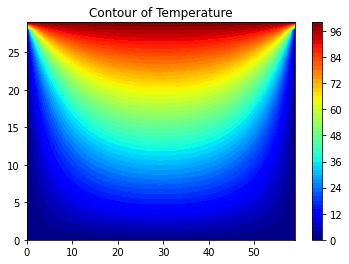

In [199]:
# Configure the contour
plt.title("Contour of Temperature")
plt.contourf(X,Y,T.T, colorinterpolation, cmap=colourMap)

# Set Colorbar
plt.colorbar()

# Show the result in the plot window
plt.show()

print("")